## `Follow along in this notebook to see the creation process of Figure 3: Method Rates`

### `We will first import any packages needed`

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

### `We can now load in and preview the data`

In [2]:
cfh = 'F:\\Research\\Funded\\UIREEJ\\Data\\Catch.pkl'
catch = pd.read_pickle(cfh)

catch['_Site'].replace('North Down-Stream', 'Down-Stream', inplace=True)
catch['_Site'].replace('South Down-Stream', 'Down-Stream', inplace=True)
catch['_Site'].replace('South Up-Stream', 'Up-Stream', inplace=True)
catch['_Site'].replace('North Up-Stream', 'Up-Stream', inplace=True)
catch['Fishing_Gear'].replace('Dip net', 'Gill net', inplace=True)

In [3]:
c_groups = catch.groupby(by=['_Site', 'Fishing_Gear'])
catch_per_loc = pd.DataFrame(c_groups['Fish'].agg('count'))
catch_per_loc.columns = ['Fish_Caught']
catch_per_loc

Fish_Caught
_Site       Fishing_Gear               
Down-Stream Cast Net               1908
            Gill net                 11
            Hook and Line            96
            Hoop trap                19
Up-Stream   Cast Net                  3
            Electrofishing          641
            Gill net                  8
            Hook and Line            14
            Hoop trap                49

In [4]:
efh = 'F:\\Research\\Funded\\UIREEJ\\Data\\Effort.pkl'
effort = pd.read_pickle(efh)

effort['_Site'].replace('North Down-Stream', 'Down-Stream', inplace=True)
effort['_Site'].replace('South Down-Stream', 'Down-Stream', inplace=True)
effort['_Site'].replace('South Up-Stream', 'Up-Stream', inplace=True)
effort['_Site'].replace('North Up-Stream', 'Up-Stream', inplace=True)

In [5]:
e_groups = effort.groupby(by=['_Site', 'Fishing_Gear'])
effort_per_loc = pd.DataFrame(e_groups['Total Gear Effort (min)'].agg('sum')).drop('0')
effort_per_loc.columns = ['Fishing_Minutes']
effort_per_loc

Fishing_Minutes
_Site       Fishing_Gear                   
Down-Stream Cast Net               12758.72
            Gill net                2125.00
            Hook and Line           8324.00
            Hoop trap              36935.00
Up-Stream   Cast Net                 290.00
            Electrofishing          2179.99
            Gill net                1980.00
            Hook and Line           2110.00
            Hoop trap              31940.00

In [6]:
catch_per_min = pd.DataFrame(catch_per_loc['Fish_Caught'] / effort_per_loc['Fishing_Minutes'])
catch_per_min.columns = ['Catch_Per_Min']
catch_per_min

Catch_Per_Min
_Site       Fishing_Gear                 
Down-Stream Cast Net             0.149545
            Gill net             0.005176
            Hook and Line        0.011533
            Hoop trap            0.000514
Up-Stream   Cast Net             0.010345
            Electrofishing       0.294038
            Gill net             0.004040
            Hook and Line        0.006635
            Hoop trap            0.001534

In [7]:
matplotlib.rcParams['font.family'] = 'calibri'
matplotlib.rcParams['axes.titlecolor'] = 'black'
matplotlib.rcParams['axes.titlesize'] = 43
matplotlib.rcParams['axes.titlepad'] = 15
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['axes.labelsize'] = 30
matplotlib.rcParams['axes.labelpad'] = 25
matplotlib.rcParams['axes.xmargin'] = .75
matplotlib.rcParams['axes.ymargin'] = .025
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.formatter.use_mathtext'] = True
matplotlib.rcParams['xtick.labelsize'] = 24
matplotlib.rcParams['ytick.labelsize'] = 24
matplotlib.rcParams['legend.fontsize'] = 24
matplotlib.rcParams['legend.labelspacing'] = 0.8
matplotlib.rcParams['legend.framealpha'] = 0
matplotlib.rcParams['text.usetex'] = True

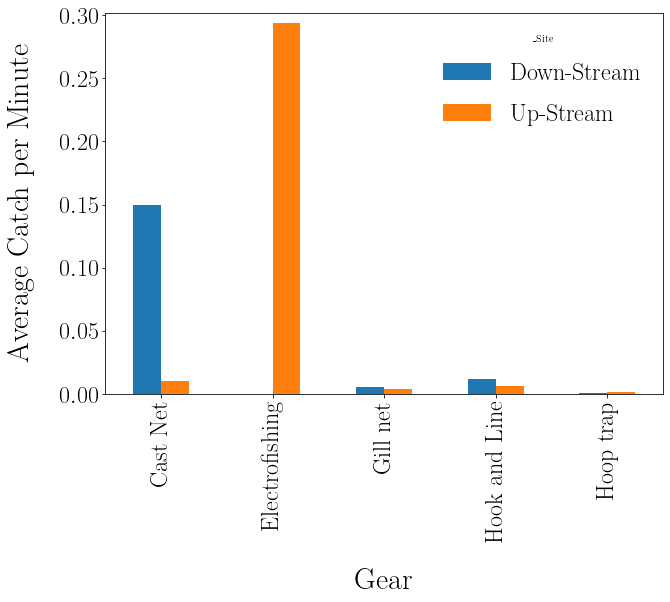

In [8]:
fig = catch_per_min.unstack().T.plot.bar()

fig.set_xticklabels(['Cast Net', 'Electrofishing', 'Gill net', 'Hook and Line', 'Hoop trap'])
fig.set_xlabel('Gear')
fig.set_ylabel('Average Catch per Minute')

# SCALE
fig = plt.gcf()
fig.set_size_inches(10, 7)


